In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

**Load the cleaned data**

In [2]:
current_dir = os.getcwd() 
relative_path_train = os.path.join('..', 'data', 'cleaned_train_data.csv')

cleaned_data = pd.read_csv(os.path.join(current_dir, relative_path_train))

In [3]:
cleaned_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103590,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103591,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103592,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Univariate Analysis**

Histogram for numerical vaiables and Pie charts for categorical variables

In [4]:
# Define custom colors for the pie charts
# colors kteer 34an i am just a girrrrrrll
#colors = [ '#b9eee1', '#79d3be', '#39b89a','#ff5883', '#ff91ad', '#fec9d7']
#colors = ['#a8e8f9', '#00537a', '#013c58', '#f5a201', '#ffba42', '#ffd35b']
#colors = ['#9f8be8', '#af99ff', '#caadff', '#ffc2e2', '#ffadc7', '#ff99b6']
#colors = ['#535878', '#9db0ce', '#b8d8e3', '#fee1dd', '#e9c2c5', '#cea0aa']
colors = ['#5a77d8', '#81b1fb', '#c3dbfd', '#ff5db6', '#fe86c8', '#ffc0db']

# Pie charts for each variable
categorical_variables = [
    'satisfaction', 'Gender', 'Customer Type', 'Type of Travel',
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Class', 'Gate location', 'Food and drink',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Inflight service', 'Cleanliness','Online boarding'
]

continuous_variables = ['Age', 'Flight Distance', 'Arrival Delay in Minutes', 'Departure Delay in Minutes']

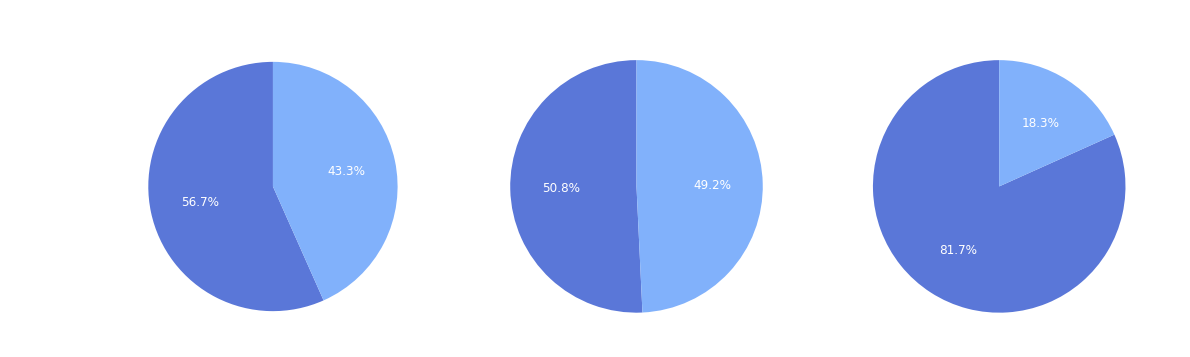

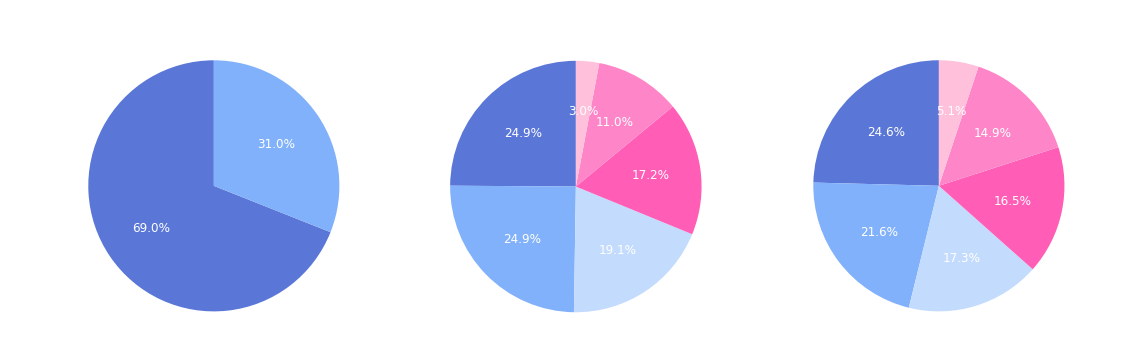

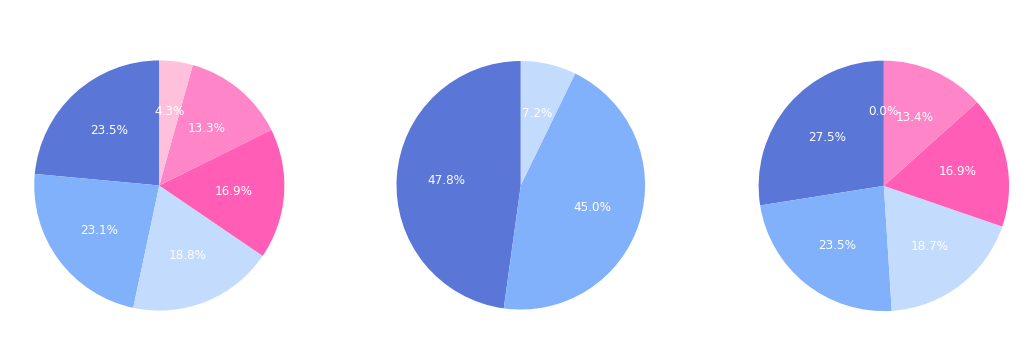

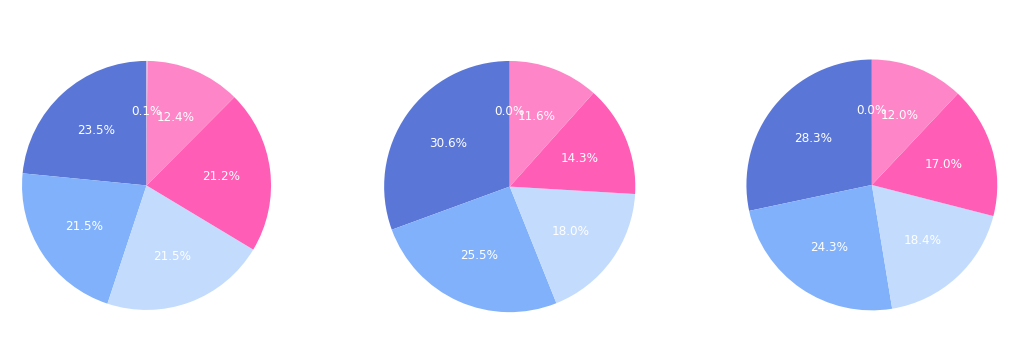

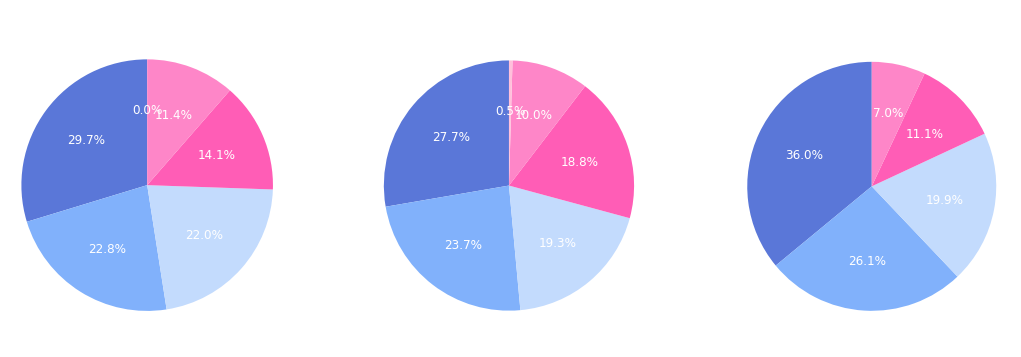

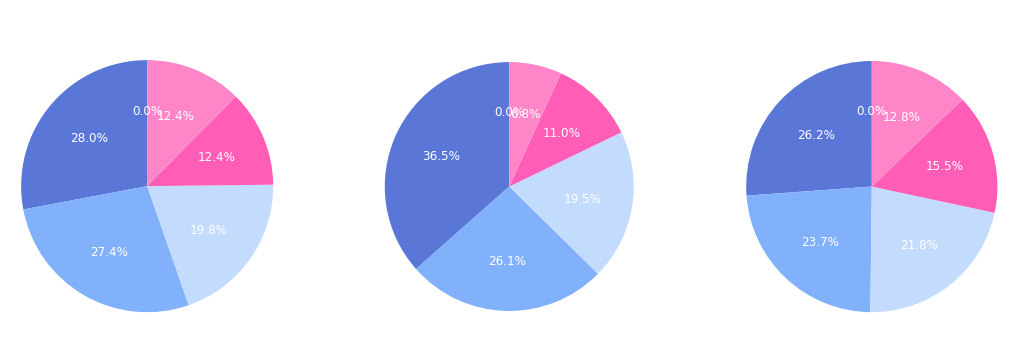

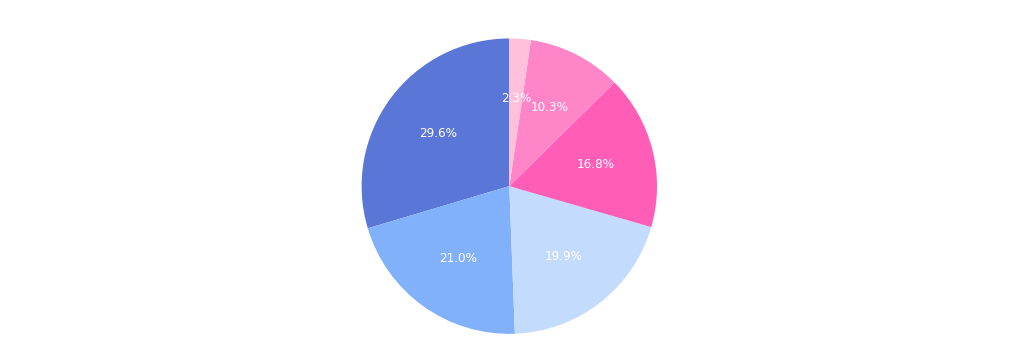

In [5]:
# Create subplots for each group of 3 variables
for i in range(0, len(categorical_variables), 3):
    num_vars = min(3, len(categorical_variables[i:]))  # Adjust the number of variables in the last group
    fig, axs = plt.subplots(1, num_vars, figsize=(18, 6))  # Set a fixed figure size
    
    # If there is only one variable in the last group, convert axs to a list to make it subscriptable
    if num_vars == 1:
        axs = [axs]
    
    for j, var in enumerate(categorical_variables[i:i+num_vars]):
        counts = cleaned_data[var].value_counts()
        axs[j].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12, 'color': 'white'})
        axs[j].set_title(f'Distribution of {var}', color='white', fontsize=14,fontweight='bold', fontstyle='italic', fontfamily='serif')
        axs[j].axis('equal')  
    
    plt.subplots_adjust(wspace=0.3)
    plt.show()

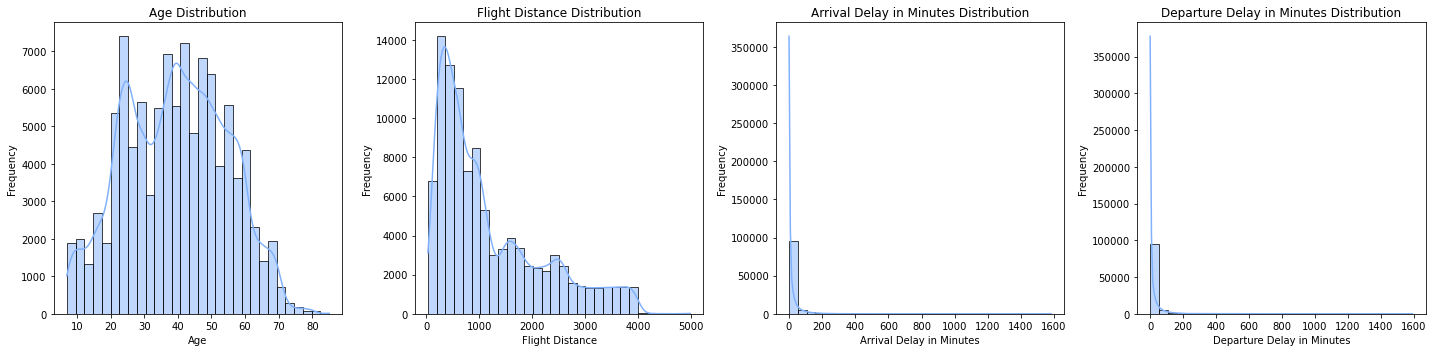

In [6]:
# Histograms for numerical variables
plt.figure(figsize=(20, 5))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(1, 4, i)
    sns.histplot(cleaned_data[col], bins=30, kde=True, color='#81b1fb')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Bivariate Analysis**

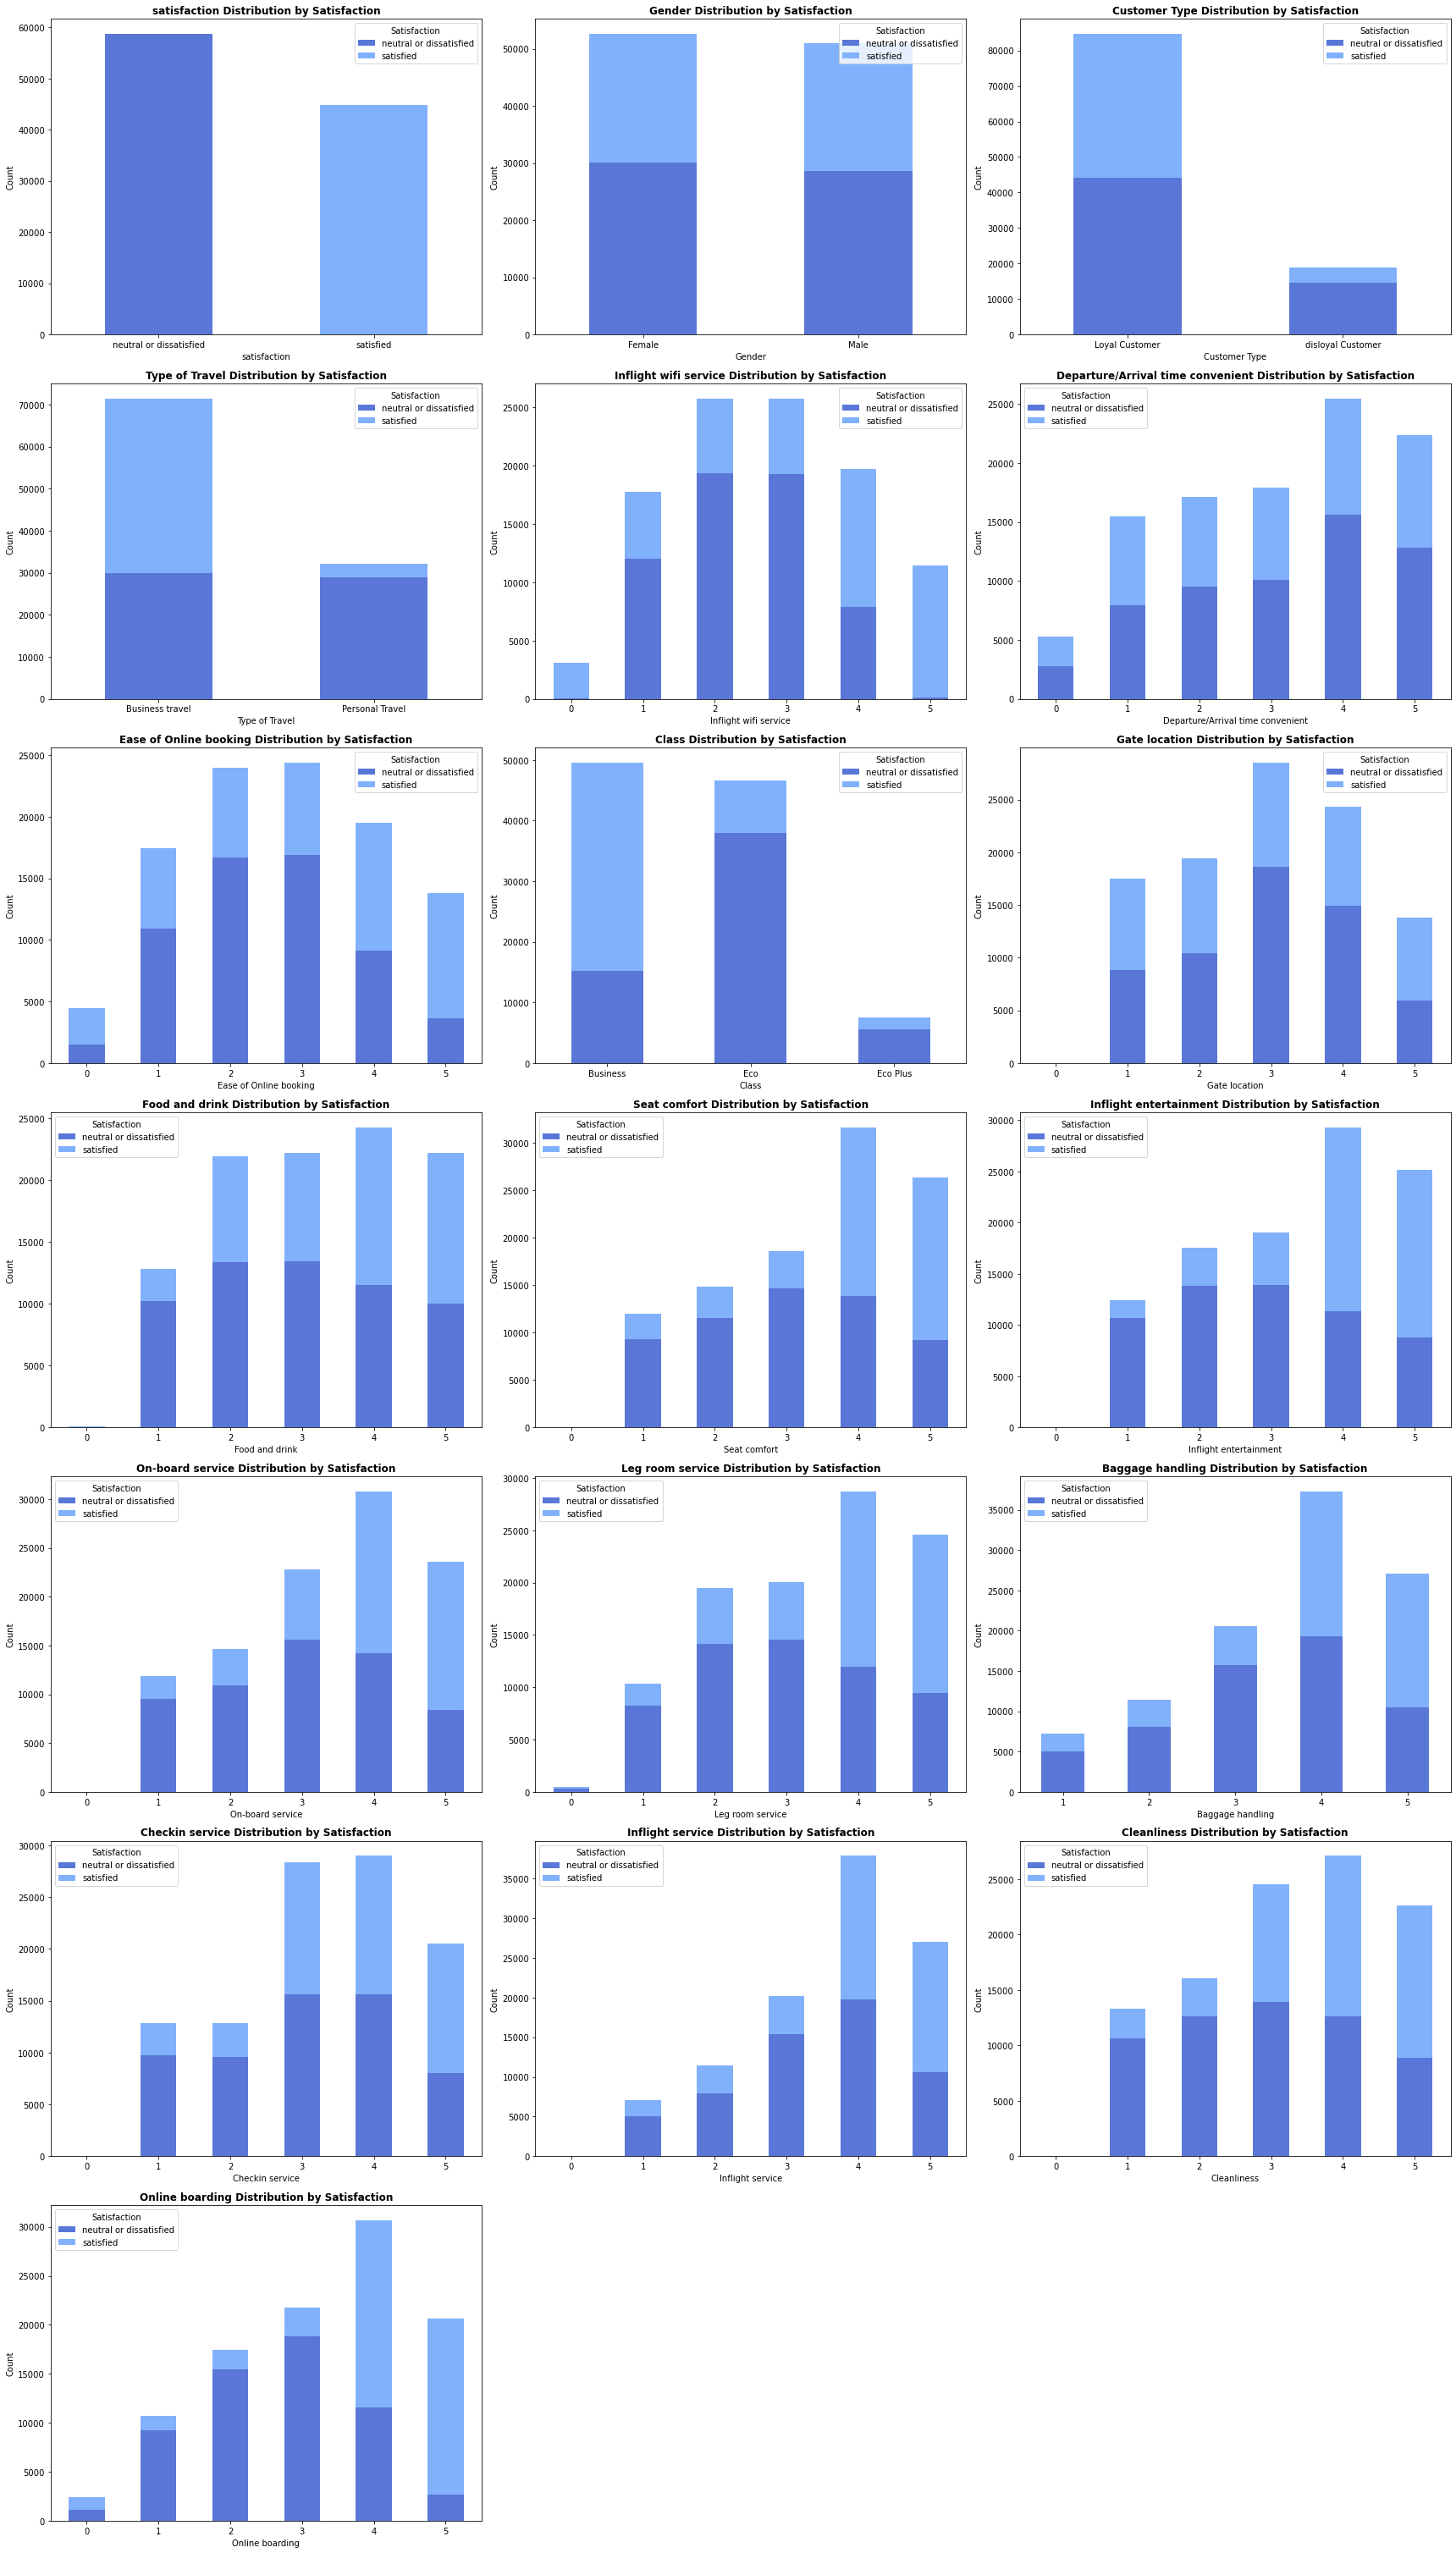

In [7]:
num_plots = len(categorical_variables)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

plt.figure(figsize=(24, 6 * num_rows))  # Adjusting the figure size based on the number of rows

for i, col in enumerate(categorical_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    satisfaction_counts = cleaned_data.groupby([col, 'satisfaction']).size().unstack()
    satisfaction_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#5a77d8', '#81b1fb'])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution by Satisfaction', fontweight='bold')  # Set font weight to bold
    plt.legend(title='Satisfaction')
    plt.xticks(rotation=0)  # Set x-axis tick labels rotation to 0 degrees (horizontal)

plt.tight_layout()
plt.show()

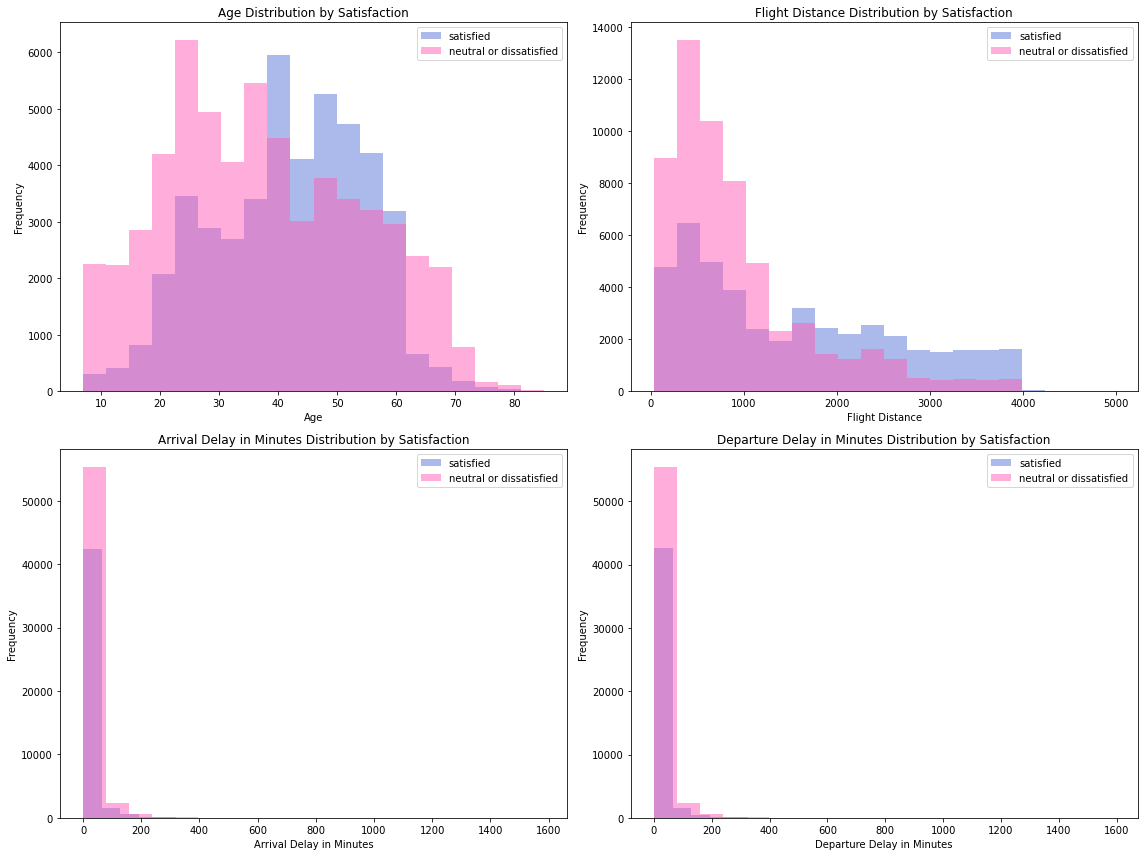

In [8]:
# Continuous histograms for numerical columns showing distribution of satisfaction
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(2, 2, i)
    plt.hist(cleaned_data[cleaned_data['satisfaction'] == 'satisfied'][col], bins=20, alpha=0.5, color='#5a77d8', label='satisfied')
    plt.hist(cleaned_data[cleaned_data['satisfaction'] == 'neutral or dissatisfied'][col], bins=20, alpha=0.5, color='#ff5db6', label='neutral or dissatisfied')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{col} Distribution by Satisfaction')

plt.tight_layout()
plt.show()

**Multivariate Analysis**

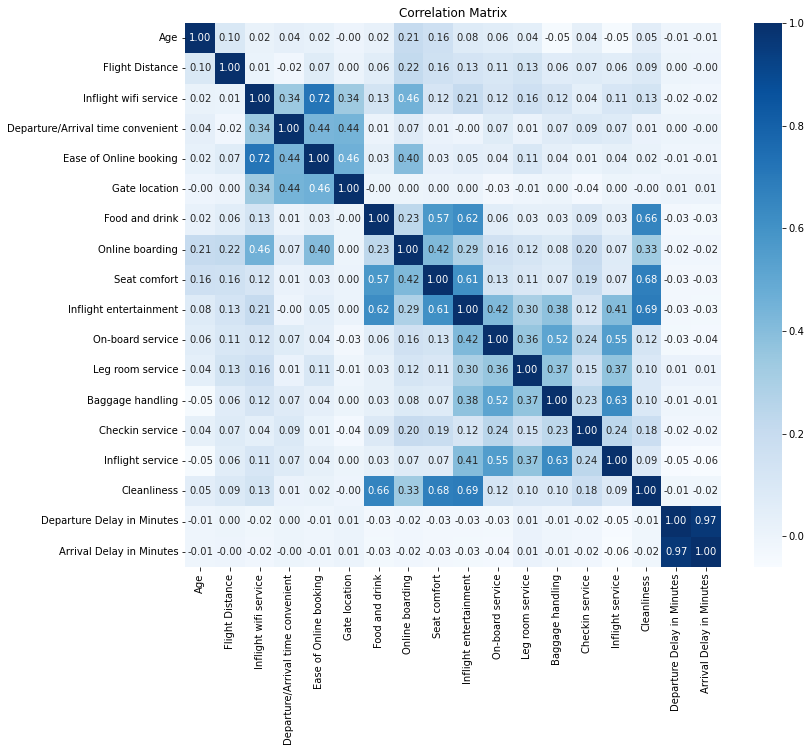

In [26]:
import seaborn as sns

# Compute the correlation matrix
corr = cleaned_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
